## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

'head' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [3]:
# Write your code here
happiness = pd.read_csv(HAPPINESS_DATASET, sep=',')
print("Happiness Data: ")
happiness.head()

Happiness Data: 


,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [4]:
countries = pd.read_csv(COUNTRIES_DATASET, sep=',')
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
for index, row in countries.iterrows():
    if str(row['literacy']) != 'nan':
        literacy = float(str(row['literacy']).replace(',', '.'))
        countries.literacy[index] = literacy
print("Country Data: ")
countries.head()

Country Data: 


,country_name,area,population,literacy
0,afghanistan,647500,31056997,36.0
1,albania,28748,3581655,86.5
2,algeria,2381740,32930091,70.0
3,argentina,2766890,39921833,97.1
4,armenia,29800,2976372,98.6


In [5]:
happiness

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States
...,...,...,...,...,...,...,...,...
130,Venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean
131,Vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia
132,Yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa
133,Zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa


In [6]:
countries

,country_name,area,population,literacy
0,afghanistan,647500,31056997,36.0
1,albania,28748,3581655,86.5
2,algeria,2381740,32930091,70.0
3,argentina,2766890,39921833,97.1
4,armenia,29800,2976372,98.6
...,...,...,...,...
130,venezuela,912050,25730435,93.4
131,vietnam,329560,84402966,90.3
132,yemen,527970,21456188,50.2
133,zambia,752614,11502010,80.6


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify to have all the rows in the final dataframe

In [7]:
# Write your code here
countries['country'] = countries['country_name'].apply(lambda x: x.title())
countries.head()

,country_name,area,population,literacy,country
0,afghanistan,647500,31056997,36.0,Afghanistan
1,albania,28748,3581655,86.5,Albania
2,algeria,2381740,32930091,70.0,Algeria
3,argentina,2766890,39921833,97.1,Argentina
4,armenia,29800,2976372,98.6,Armenia


In [8]:
country_features = pd.merge(happiness, countries, on='country').drop('country_name', axis=1)
country_features.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6


## Task 3: Where do people are happier?

Print the top 10 countries based on their happiness score (high is better).

In [212]:
# Write your code here
happiness.sort_values('happiness_score', ascending=False)[['country', 'happiness_score']][:10]

,country,happiness_score
38,Finland,7.8087
31,Denmark,7.6456
115,Switzerland,7.5599
50,Iceland,7.5045
92,Norway,7.4880
87,Netherlands,7.4489
114,Sweden,7.3535
88,New Zealand,7.2996
6,Austria,7.2942
72,Luxembourg,7.2375


We are interested to know in what world region the people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [213]:
# Write your code here
world_region_happiness = happiness.groupby(happiness.world_region)['happiness_score'].agg(['mean', 'count'])
sort_world_region_happiness = world_region_happiness.sort_values('mean', ascending=False)
sort_world_region_happiness

,mean,count
world_region,,
North America and ANZ,7.173525,4
Western Europe,6.967405,20
Latin America and Caribbean,5.971280,20
Central and Eastern Europe,5.891393,14
Southeast Asia,5.517788,8
East Asia,5.483633,3
Commonwealth of Independent States,5.358342,12
Middle East and North Africa,5.269306,16
Sub-Saharan Africa,4.393856,32


The first region has only a few countries! What are them and what is their score?

In [214]:
# Write your code here
countries_happiness = happiness[happiness.world_region == 'North America and ANZ'][['country', 'happiness_score']]
countries_happiness

,country,happiness_score
5,Australia,7.2228
21,Canada,7.2321
88,New Zealand,7.2996
127,United States,6.9396


## Task 4: How literate is the world?

Print the name of countries with a level of literacy of 100%. 

For each country, print the name and the world region with the format: *{region name} - {country name} ({happiness score})*

In [10]:
country_features

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6
...,...,...,...,...,...,...,...,...,...,...,...
130,Venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,912050,25730435,93.4
131,Vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,329560,84402966,90.3
132,Yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,527970,21456188,50.2
133,Zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,752614,11502010,80.6


In [11]:
# Write your code here
literacy_countries = country_features[country_features['literacy'] == 100.0]
literacy_countries.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
5,Australia,7.2228,0.944855,73.604538,0.915432,0.190460,0.415169,North America and ANZ,7686850,20264082,100.0
31,Denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe,43094,5450661,100.0
38,Finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe,338145,5231372,100.0
72,Luxembourg,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe,2586,474413,100.0
92,Norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe,323802,4610820,100.0


In [12]:
for index, row in literacy_countries.iterrows():
    print(f'{row.world_region} - {row.country} ({row.happiness_score})')

North America and ANZ - Australia (7.222799778)
Western Europe - Denmark (7.645599842)
Western Europe - Finland (7.808700085)
Western Europe - Luxembourg (7.237500191)
Western Europe - Norway (7.487999916000001)


What is the global average?

In [13]:
# Write your code here
print(f'The average of the literacy is {country_features.literacy.mean()}')

The average of the literacy is 81.85112781954886


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [16]:
# Write your code here
country_literacy_50 = country_features[country_features['literacy'] < 50]
for index, row in country_literacy_50.iterrows():
    print(f'{row.country} - {row.literacy}')


print('\n\nThe percentage is {:.2%}'.format(len(country_literacy_50) / len(country_features)))

Afghanistan - 36.0
Bangladesh - 43.1
Benin - 40.9
Burkina Faso - 26.6
Chad - 47.5
Ethiopia - 42.7
Guinea - 35.9
Iraq - 40.4
Mali - 46.4
Mauritania - 41.7
Mozambique - 47.8
Nepal - 45.2
Niger - 17.6
Pakistan - 45.7
Senegal - 40.2
Sierra Leone - 31.4


The percentage is 11.85%


Print the raw number and the percentage of world population that is illiterate.

In [17]:
# Write your code here
world_population_total = country_features.population.sum()

number_illiterate = 0
for index, row in country_features.iterrows():
    if str(row.literacy) != 'nan':
        number_illiterate += (1 - row.literacy * 0.01) * row.population

print('The number of illiterate population in the world is {:.0f}, the percentage is {:.2%}'.format(number_illiterate, number_illiterate / world_population_total))

The number of illiterate population in the world is 1249372988, the percentage is 20.33%


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [18]:
# Write your code here
country_features['population_density'] = country_features.population / country_features.area

country_features

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0,47.964474
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5,124.587971
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0,13.826065
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1,14.428413
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6,99.878255
...,...,...,...,...,...,...,...,...,...,...,...,...
130,Venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,912050,25730435,93.4,28.211650
131,Vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,329560,84402966,90.3,256.108041
132,Yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,527970,21456188,50.2,40.639029
133,Zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,752614,11502010,80.6,15.282748


What is the happiness score of the 3 countries with lowest population density?

In [19]:
# Write your code here
country_happiness_density = country_features.sort_values('population_density', ascending=True)[['country', 'happiness_score', 'population_density']]
country_happiness_density[:3]

,country,happiness_score,population_density
83,Mongolia,5.4562,1.810751
5,Australia,7.2228,2.636201
14,Botswana,3.4789,2.731371


## Task 6: Healty and happy?

Plot in scatter plot the happiness score (x) and healty life expectancy (y).

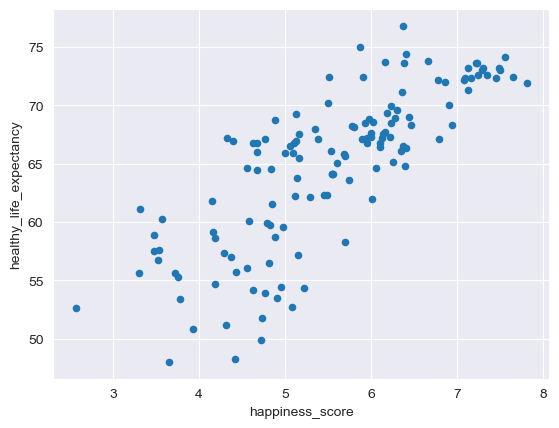

In [259]:
# Write your code here
country_features.plot.scatter(x='happiness_score', y='healthy_life_expectancy')
plt.show()

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.